<div class="alert alert-block alert-success">
    <h1 align="center">Prediction  pralidoxime dose in acute organophosphate poisoning  using machine learning techniques</h1>
    <h3 align="center">Under the supervision of: ‪Professor Dr.Babak Mostafazadeh</h3>
</div>

<img src = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/390px-Scikit_learn_logo_small.svg.png">

## Importing the libraries

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Let's Import the Packages...
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;">load Data </span></strong>
<p style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;"> 
</div>

In [3]:
#Let's Read csv file
# data = pd.read_csv("organ_final - corect -clean_class_param_end.csv")
# data = pd.read_csv("pralidoxime_level_param.csv")
data = pd.read_csv("clean_325 parm.csv")
#Show some records of dataframe
data.sample(5)

,Unnamed: 0,time_duration,Sex,Age,Name.of.organophosphorus,The.Amount.Of.Toxin.Consumed,Sialloreahea,Lacrimation,Miosis,Vomiting,...,HCO3...VBG,Cr,BUN,AST,ALT,ALP,Bullos.Of.Atropin,ICU.Add,Total.Pralidoxime,Pralidoxime_level
107,62,7,Female,27,Pesticide,200,Yes,No,Yes,Yes,...,20.2,0.9,44.0,314.0,188,158,0.5,No,28120,high
316,101,22,Male,50,Insecticide,100,No,No,Yes,Yes,...,20.8,1.1,13.0,20.0,19,226,0.5,No,12000,low
153,41,15,Male,20,Pesticide,400,No,No,No,Yes,...,20.6,1.7,33.0,75.0,57,133,1.0,Yes,62000,low
14,7,1,Male,36,Pesticide,30,No,No,No,Yes,...,17.7,1.7,25.0,16.0,16,377,3.0,Yes,1100,low
144,76,14,Female,28,Pesticide,500,No,No,Yes,Yes,...,20.6,0.8,22.0,19.0,11,230,1.0,Yes,29000,high


<img src="https://www.fingent.com/ae/wp-content/uploads/sites/6/2020/06/bLOG_iMAGE_33-1024x555.jpg" width=50% >


<div class="alert alert-block alert-info" dir="ltr" style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;">Prepare Data and EDA </span></strong>
<p style="text-align: center;"><strong><span style="font-family: courier new, courier; font-size: 18pt;"> 
</div>

## Prepare Data and EDA

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.index

RangeIndex(start=0, stop=324, step=1)

In [6]:
# describe inter or float data!!!
data.describe()

,Unnamed: 0,time_duration,Age,The.Amount.Of.Toxin.Consumed,GCS,Cholinestrase.Level.First,Cholinestrase.Level.Last,PH...VBG,PCO2...VBG,HCO3...VBG,Cr,BUN,AST,ALT,ALP,Bullos.Of.Atropin,Total.Pralidoxime
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,55.919753,6.932099,33.790123,120.515432,12.601852,1399.120370,1271.808642,7.276296,40.922562,20.371605,1.232099,32.968210,33.916049,28.836420,197.404321,1.279167,25949.382716
std,28.933248,6.661312,14.831534,102.237642,3.509227,2423.600602,1564.294783,0.411988,11.001121,4.720215,0.344736,16.137152,33.192816,29.815861,66.121570,1.389664,33741.110036
min,0.000000,0.000000,1.000000,3.000000,3.000000,104.000000,54.000000,4.100000,12.600000,9.300000,0.700000,7.000000,14.000000,9.000000,101.000000,0.000000,900.000000
25%,34.000000,2.000000,22.000000,40.000000,8.000000,258.750000,259.000000,7.280000,34.000000,17.500000,1.000000,23.000000,21.000000,15.000000,148.000000,0.500000,6072.500000
50%,59.000000,4.000000,30.000000,100.000000,15.000000,316.500000,583.500000,7.345000,40.300000,20.400000,1.200000,31.000000,25.000000,18.000000,192.000000,0.500000,12000.000000
75%,78.000000,10.000000,46.000000,200.000000,15.000000,1230.250000,1778.000000,7.380000,47.700000,23.000000,1.400000,40.000000,34.000000,27.000000,229.250000,1.500000,29000.000000
max,104.000000,23.000000,87.000000,500.000000,15.000000,11509.000000,7484.000000,7.560000,88.000000,36.500000,3.400000,103.000000,315.000000,189.000000,567.000000,9.000000,206500.000000


In [7]:
data.shape

(324, 41)

In [8]:
# Check columns list and missing values
data.isnull().sum()

Unnamed: 0                      0
time_duration                   0
Sex                             0
Age                             0
Name.of.organophosphorus        0
The.Amount.Of.Toxin.Consumed    0
Sialloreahea                    0
Lacrimation                     0
Miosis                          0
Vomiting                        0
Diarrhea                        0
Sweating                        0
Bradycardia                     0
Rhales                          0
Bronchospasm                    0
Intubation                      0
Incontinence                    0
Fasciculation                   0
Muscular.Weakness               0
Parlaysis                       0
Tachycardia                     0
Confusion                       0
Lethargia                       0
Coma                            0
Agitation                       0
Seijure                         0
GCS                             0
Cholinestrase.Level.First       0
Cholinestrase.Level.Last        0
PH...VBG      

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    324 non-null    int64  
 1   time_duration                 324 non-null    int64  
 2   Sex                           324 non-null    object 
 3   Age                           324 non-null    int64  
 4   Name.of.organophosphorus      324 non-null    object 
 5   The.Amount.Of.Toxin.Consumed  324 non-null    int64  
 6   Sialloreahea                  324 non-null    object 
 7   Lacrimation                   324 non-null    object 
 8   Miosis                        324 non-null    object 
 9   Vomiting                      324 non-null    object 
 10  Diarrhea                      324 non-null    object 
 11  Sweating                      324 non-null    object 
 12  Bradycardia                   324 non-null    object 
 13  Rhale

In [10]:
# Get unique count for each variable
data.nunique()

Unnamed: 0                      105
time_duration                    22
Sex                               2
Age                              56
Name.of.organophosphorus          2
The.Amount.Of.Toxin.Consumed     25
Sialloreahea                      2
Lacrimation                       2
Miosis                            2
Vomiting                          2
Diarrhea                          2
Sweating                          2
Bradycardia                       2
Rhales                            2
Bronchospasm                      2
Intubation                        2
Incontinence                      2
Fasciculation                     2
Muscular.Weakness                 2
Parlaysis                         2
Tachycardia                       2
Confusion                         2
Lethargia                         2
Coma                              2
Agitation                         2
Seijure                           2
GCS                              10
Cholinestrase.Level.First   

<img src="https://www.unilab.eu/wp-content/uploads/2021/03/unilab_heat_transfer_software_blog_data_visualization-1024x576-1024x585.jpg" width=50%>

## Visualization

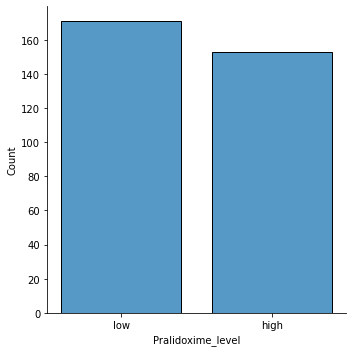

In [11]:
sns.displot(data,x="Pralidoxime_level",shrink=0.8)

In [12]:
# sns.displot(data,x="Outcome",shrink=0.8)

In [13]:
# sns.displot(data,x="Outcome",bins=2,shrink=0.8)

<AxesSubplot:xlabel='Coma', ylabel='Total.Pralidoxime'>

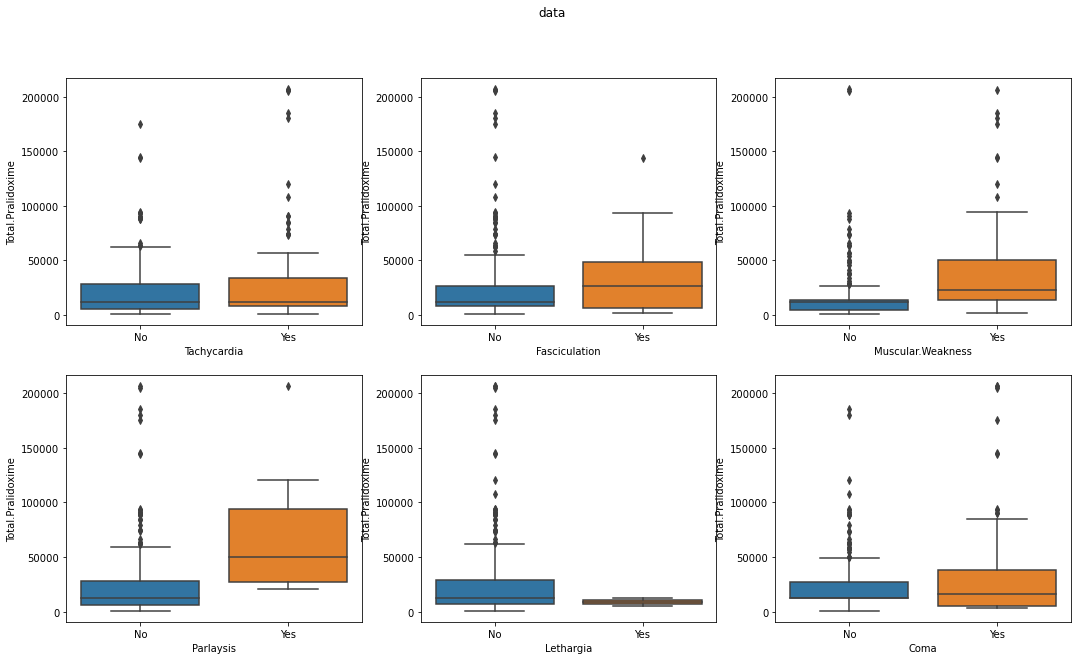

In [14]:
fig, axes = plt.subplots(2,3, figsize=(18, 10))
fig.suptitle('data')
data =data

sns.boxplot(ax=axes[0,0],data=data,y="Total.Pralidoxime",x="Tachycardia")
sns.boxplot(ax=axes[0,1],data=data,y="Total.Pralidoxime",x ="Fasciculation")
sns.boxplot(ax=axes[0,2],data=data,y="Total.Pralidoxime",x ="Muscular.Weakness")
sns.boxplot(ax=axes[1,0],data=data,y="Total.Pralidoxime",x ="Parlaysis")
sns.boxplot(ax=axes[1,1],data=data,y="Total.Pralidoxime",x ="Lethargia")
sns.boxplot(ax=axes[1,2],data=data,y="Total.Pralidoxime",x ="Coma")


In [15]:
# sns.displot(data,x="Background.Diseases")

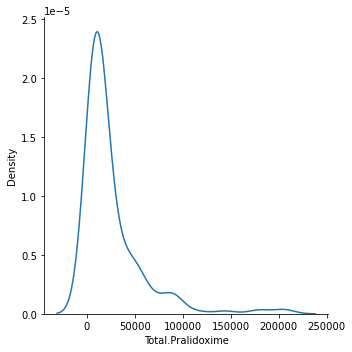

In [16]:
sns.displot(data,x="Total.Pralidoxime",kind="kde")

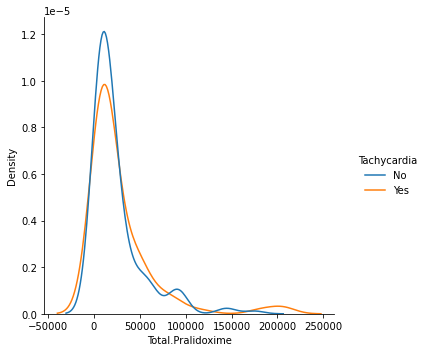

In [17]:
sns.displot(data,x="Total.Pralidoxime",kind="kde",hue ="Tachycardia")

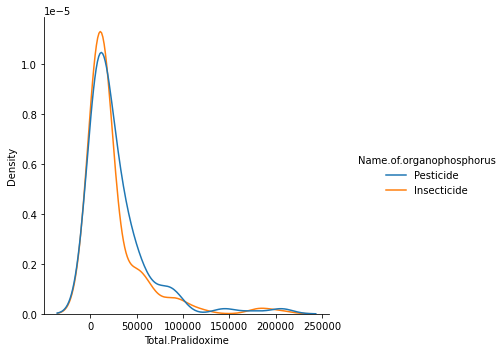

In [18]:
sns.displot(data,x="Total.Pralidoxime",kind="kde",hue ="Name.of.organophosphorus")

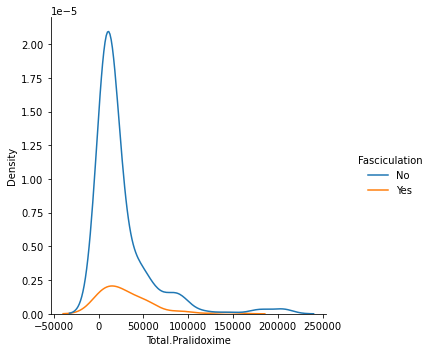

In [19]:
sns.displot(data,x="Total.Pralidoxime",kind="kde",hue ="Fasciculation")

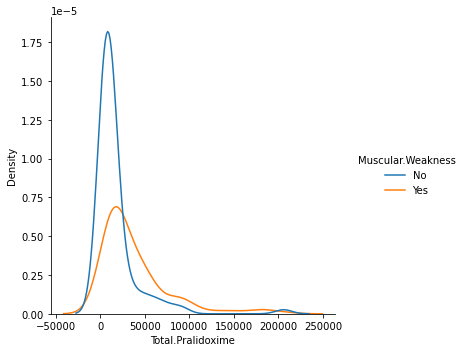

In [20]:
sns.displot(data,x="Total.Pralidoxime",kind="kde",hue ="Muscular.Weakness")

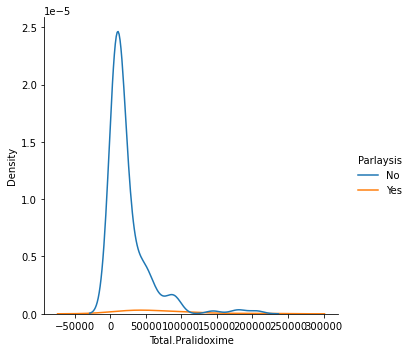

In [21]:
sns.displot(data,x="Total.Pralidoxime",kind="kde",hue ="Parlaysis")

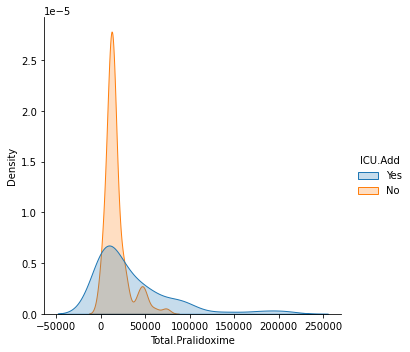

In [22]:
sns.displot(data,x="Total.Pralidoxime",kind="kde",hue ="ICU.Add",fill=True)

In [23]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

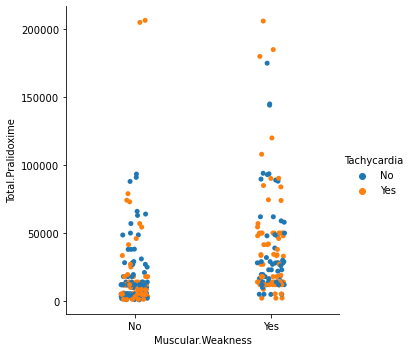

In [24]:
sns.catplot(data,x="Muscular.Weakness",y="Total.Pralidoxime",jitter=True,hue='Tachycardia')

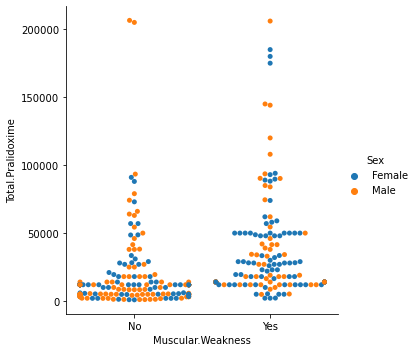

In [25]:
sns.catplot(data,x="Muscular.Weakness",y="Total.Pralidoxime",kind="swarm",hue="Sex")

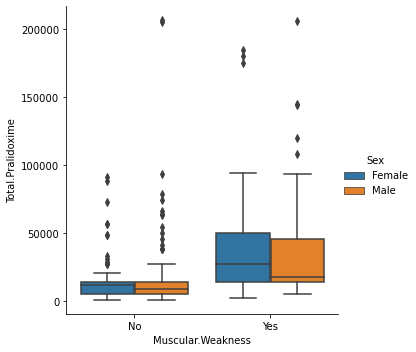

In [26]:
sns.catplot(data,x="Muscular.Weakness",y="Total.Pralidoxime",kind="box",hue="Sex")

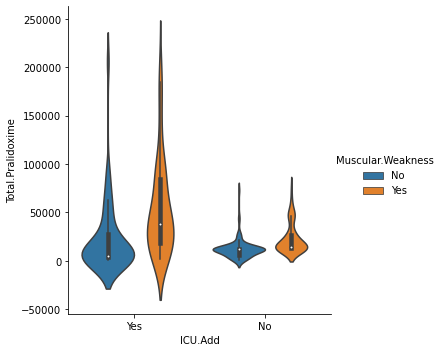

In [27]:
sns.catplot(data,x="ICU.Add",y="Total.Pralidoxime",kind="violin",hue='Muscular.Weakness')

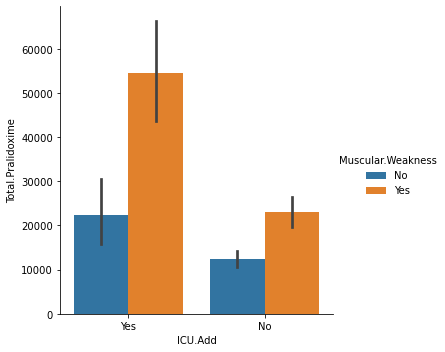

In [28]:
sns.catplot(data,x="ICU.Add",y="Total.Pralidoxime",kind="bar",hue='Muscular.Weakness')

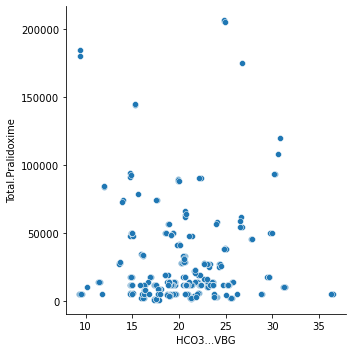

In [29]:
sns.relplot(data=data,x="HCO3...VBG",y="Total.Pralidoxime")

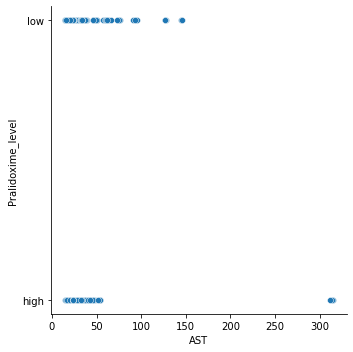

In [30]:
sns.relplot(data=data,x="AST",y="Pralidoxime_level")

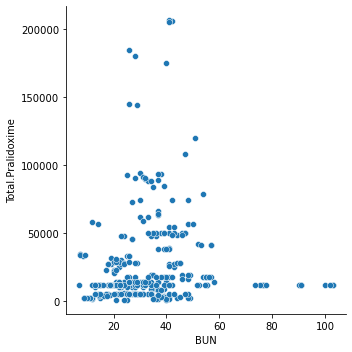

In [31]:
sns.relplot(data=data,x="BUN",y="Total.Pralidoxime")

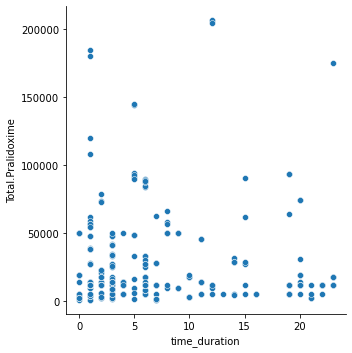

In [32]:
sns.relplot(data=data,x="time_duration",y="Total.Pralidoxime")

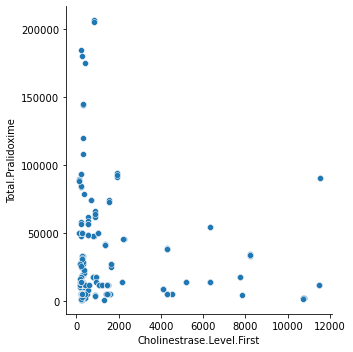

In [33]:
sns.relplot(data=data,x="Cholinestrase.Level.First",y="Total.Pralidoxime")

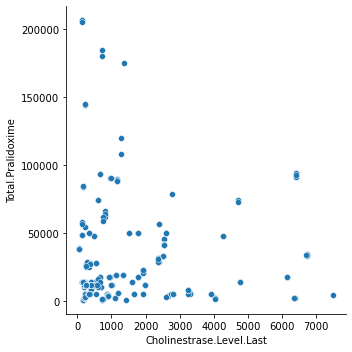

In [34]:
sns.relplot(data=data,x="Cholinestrase.Level.Last",y="Total.Pralidoxime")

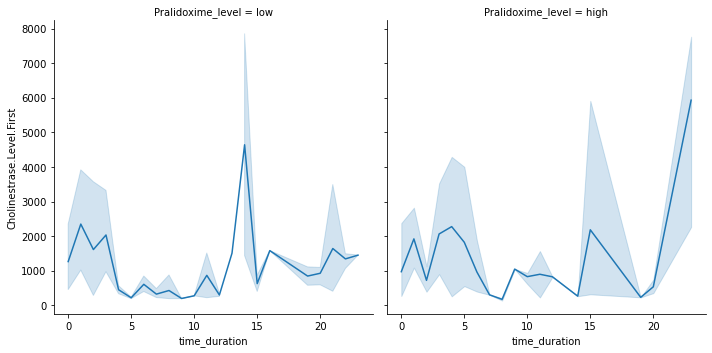

In [35]:
sns.relplot(x="time_duration", y="Cholinestrase.Level.First", kind="line", data=data,col="Pralidoxime_level")

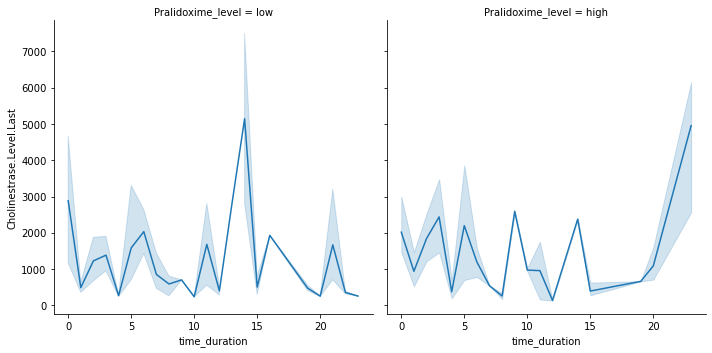

In [36]:
sns.relplot(x="time_duration", y="Cholinestrase.Level.Last", kind="line", data=data,col="Pralidoxime_level",)

In [37]:
data.groupby("Total.Pralidoxime").count()

,Unnamed: 0,time_duration,Sex,Age,Name.of.organophosphorus,The.Amount.Of.Toxin.Consumed,Sialloreahea,Lacrimation,Miosis,Vomiting,...,PCO2...VBG,HCO3...VBG,Cr,BUN,AST,ALT,ALP,Bullos.Of.Atropin,ICU.Add,Pralidoxime_level
Total.Pralidoxime,,,,,,,,,,,,,,,,,,,,,
900,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1100,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1200,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1250,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
185000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
205000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [38]:
data.groupby("Pralidoxime_level").count()

,Unnamed: 0,time_duration,Sex,Age,Name.of.organophosphorus,The.Amount.Of.Toxin.Consumed,Sialloreahea,Lacrimation,Miosis,Vomiting,...,PCO2...VBG,HCO3...VBG,Cr,BUN,AST,ALT,ALP,Bullos.Of.Atropin,ICU.Add,Total.Pralidoxime
Pralidoxime_level,,,,,,,,,,,,,,,,,,,,,
high,153,153,153,153,153,153,153,153,153,153,...,153,153,153,153,153,153,153,153,153,153
low,171,171,171,171,171,171,171,171,171,171,...,171,171,171,171,171,171,171,171,171,171


<img src="https://www.investopedia.com/thmb/OQfIj1nuS4knbj41mVM9IGI-uv0=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/correlation_defintion_-9d2d662781724d61af6d6322a2a294b5.jpg" width=50% >


# correlation data

<img src="https://www.datadeck.com/en/blog/wp-content/uploads/2018/11/cor-examples.png" />

In [39]:
data_sel = data.drop(["Unnamed: 0"],axis = 1)

In [40]:
# Finding out the correlation between the features
corr = data_sel.corr()
corr.shape

(16, 16)

<AxesSubplot:>

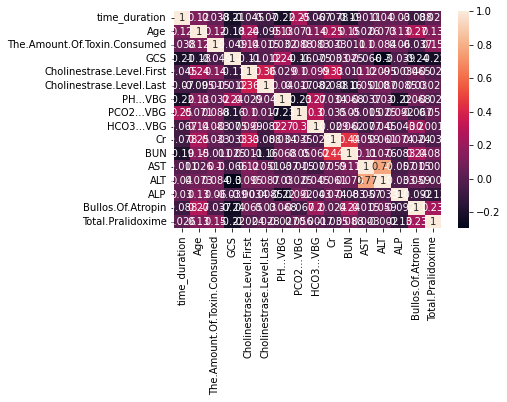

In [41]:
my_correlation = data_sel.corr()
sns.heatmap(my_correlation,annot=True)

<AxesSubplot:>

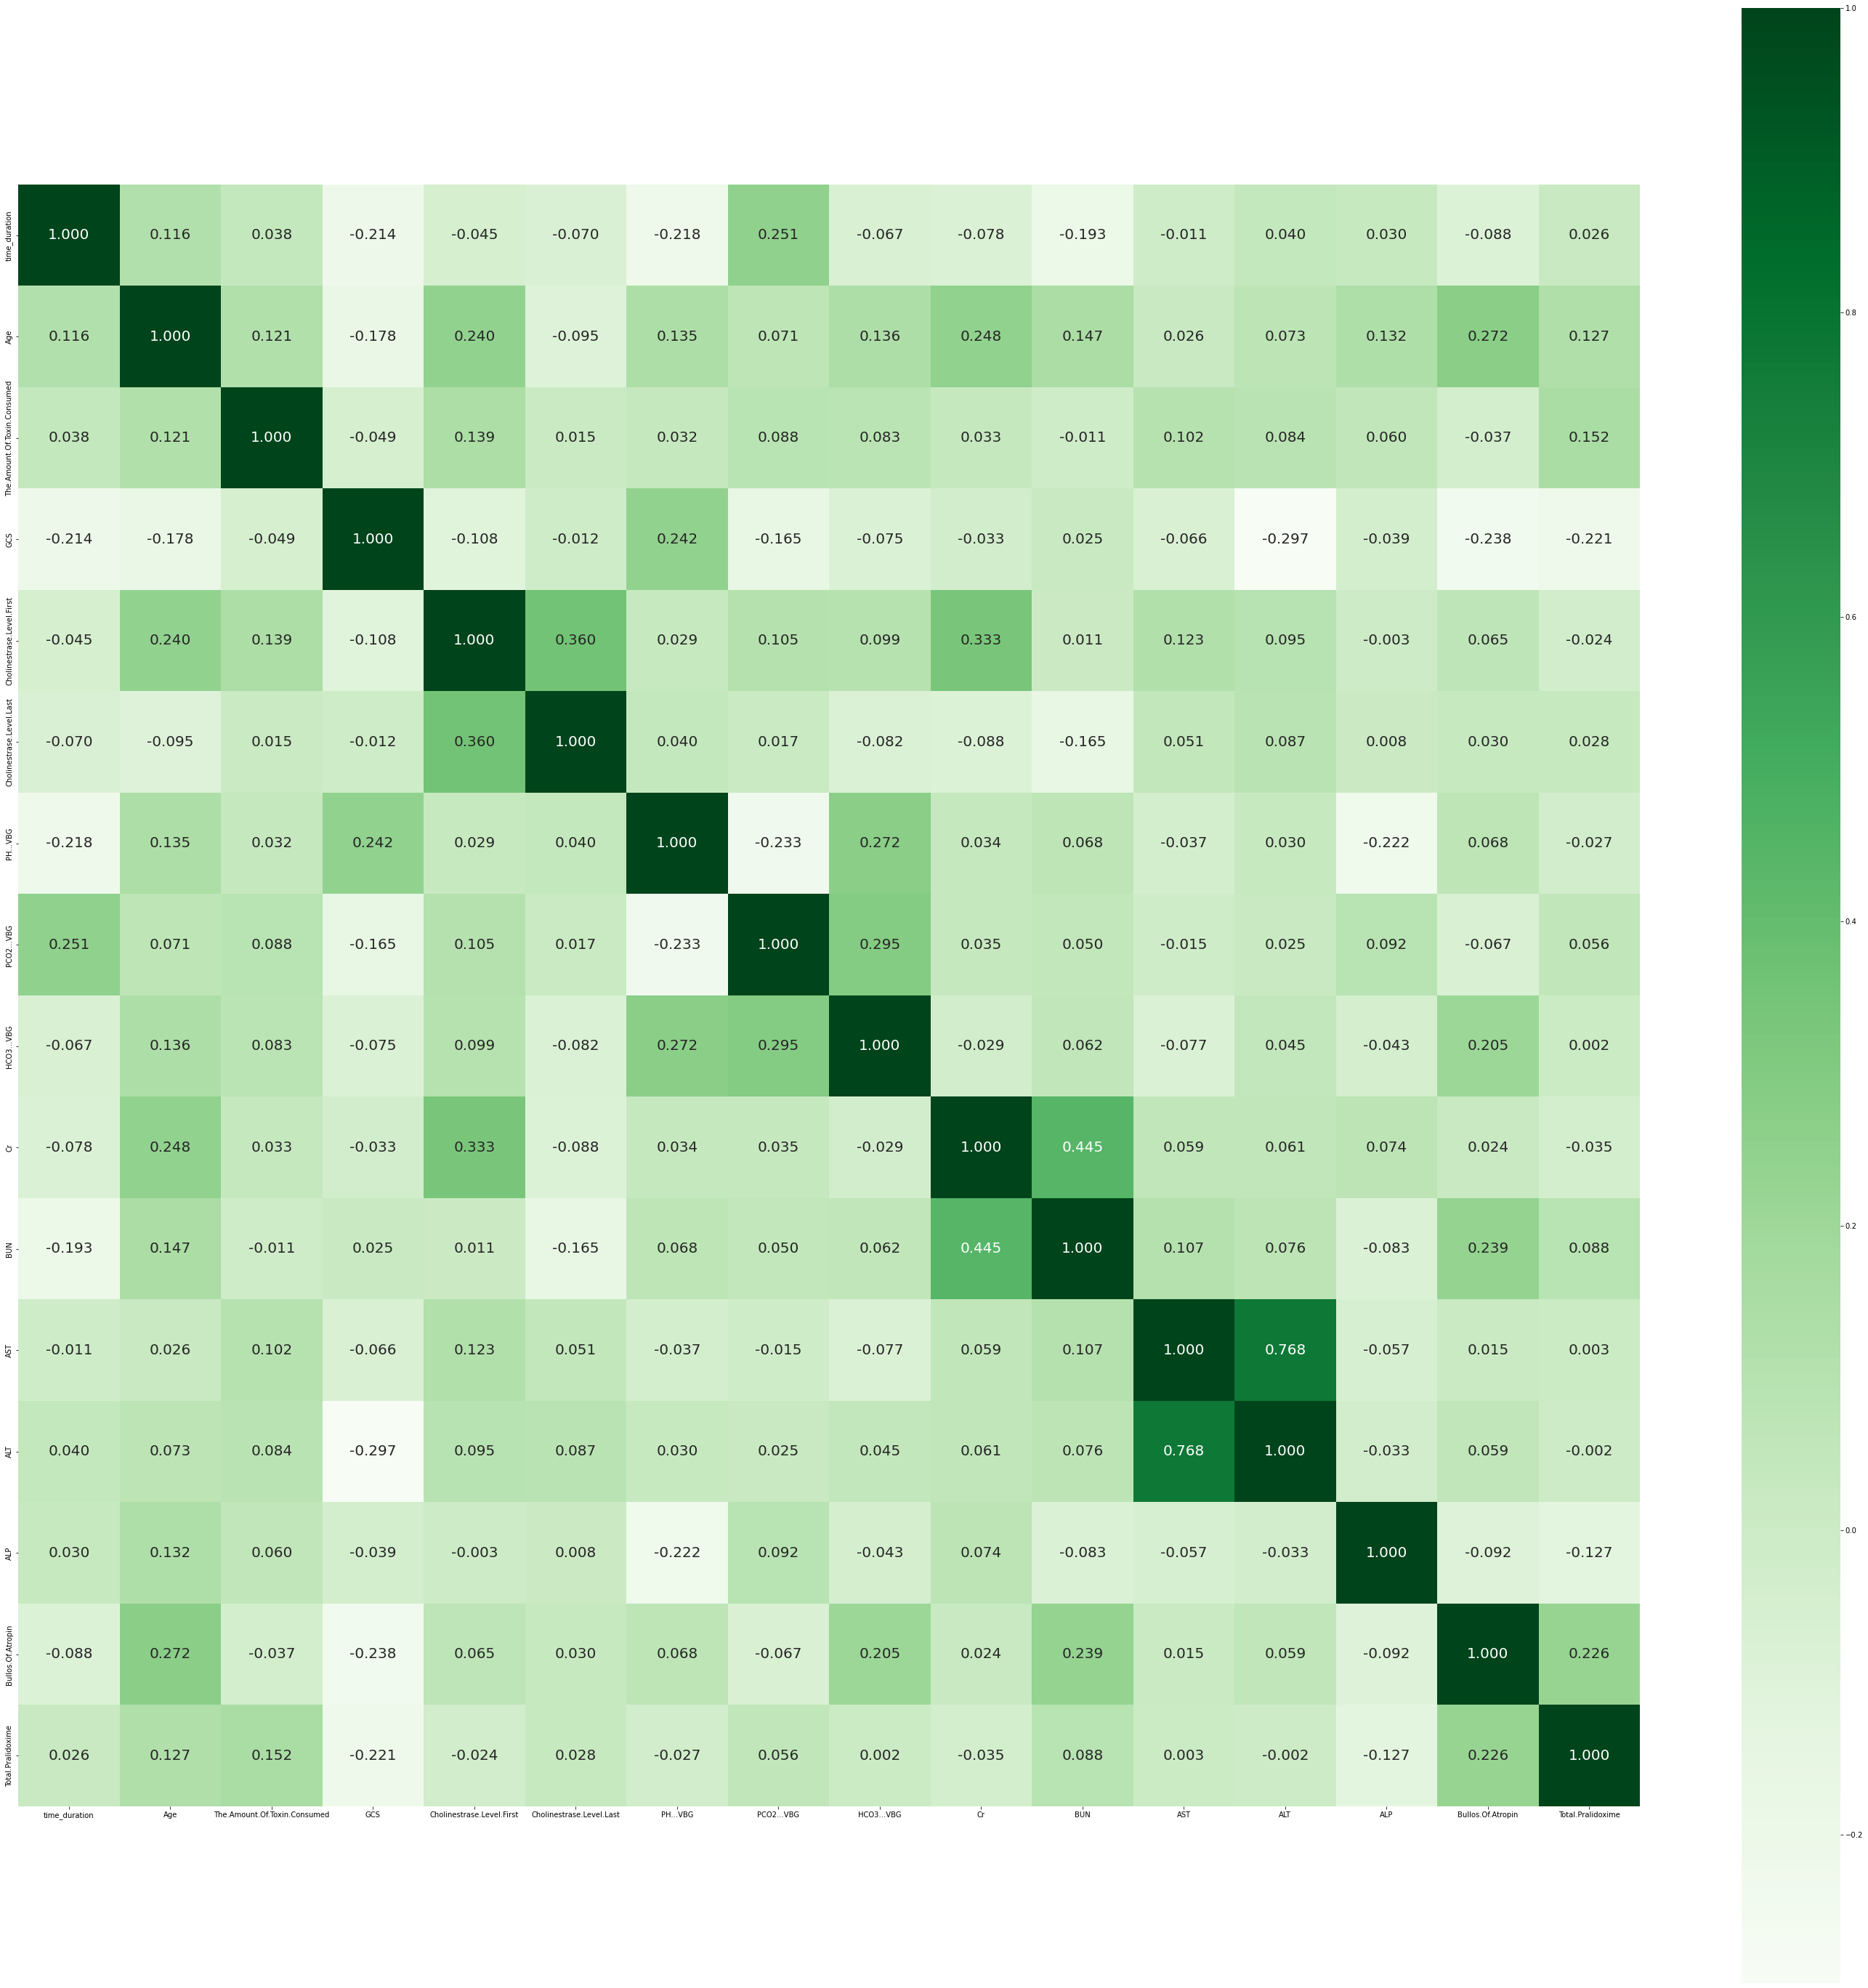

In [42]:
plt.figure(figsize=(50,50))
sns.heatmap(corr, cbar=True, square= True, fmt='.3f', annot=True, annot_kws={'size':20}, cmap='Greens')

In [43]:
data_sel.describe()

,time_duration,Age,The.Amount.Of.Toxin.Consumed,GCS,Cholinestrase.Level.First,Cholinestrase.Level.Last,PH...VBG,PCO2...VBG,HCO3...VBG,Cr,BUN,AST,ALT,ALP,Bullos.Of.Atropin,Total.Pralidoxime
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,6.932099,33.790123,120.515432,12.601852,1399.120370,1271.808642,7.276296,40.922562,20.371605,1.232099,32.968210,33.916049,28.836420,197.404321,1.279167,25949.382716
std,6.661312,14.831534,102.237642,3.509227,2423.600602,1564.294783,0.411988,11.001121,4.720215,0.344736,16.137152,33.192816,29.815861,66.121570,1.389664,33741.110036
min,0.000000,1.000000,3.000000,3.000000,104.000000,54.000000,4.100000,12.600000,9.300000,0.700000,7.000000,14.000000,9.000000,101.000000,0.000000,900.000000
25%,2.000000,22.000000,40.000000,8.000000,258.750000,259.000000,7.280000,34.000000,17.500000,1.000000,23.000000,21.000000,15.000000,148.000000,0.500000,6072.500000
50%,4.000000,30.000000,100.000000,15.000000,316.500000,583.500000,7.345000,40.300000,20.400000,1.200000,31.000000,25.000000,18.000000,192.000000,0.500000,12000.000000
75%,10.000000,46.000000,200.000000,15.000000,1230.250000,1778.000000,7.380000,47.700000,23.000000,1.400000,40.000000,34.000000,27.000000,229.250000,1.500000,29000.000000
max,23.000000,87.000000,500.000000,15.000000,11509.000000,7484.000000,7.560000,88.000000,36.500000,3.400000,103.000000,315.000000,189.000000,567.000000,9.000000,206500.000000


In [44]:
corr

,time_duration,Age,The.Amount.Of.Toxin.Consumed,GCS,Cholinestrase.Level.First,Cholinestrase.Level.Last,PH...VBG,PCO2...VBG,HCO3...VBG,Cr,BUN,AST,ALT,ALP,Bullos.Of.Atropin,Total.Pralidoxime
time_duration,1.000000,0.115581,0.037892,-0.214392,-0.045100,-0.070350,-0.218077,0.251106,-0.067450,-0.077782,-0.193184,-0.011027,0.039865,0.030351,-0.087695,0.025665
Age,0.115581,1.000000,0.120998,-0.178337,0.240132,-0.094973,0.134733,0.070601,0.136387,0.247524,0.147446,0.025915,0.072831,0.131593,0.272060,0.127066
The.Amount.Of.Toxin.Consumed,0.037892,0.120998,1.000000,-0.048665,0.138561,0.014800,0.032262,0.087905,0.082605,0.032716,-0.011207,0.102228,0.084474,0.060232,-0.036622,0.151638
GCS,-0.214392,-0.178337,-0.048665,1.000000,-0.108319,-0.012243,0.241749,-0.164612,-0.074718,-0.033165,0.024832,-0.065540,-0.297467,-0.038678,-0.237841,-0.221109
Cholinestrase.Level.First,-0.045100,0.240132,0.138561,-0.108319,1.000000,0.359838,0.029397,0.104960,0.098872,0.333203,0.010954,0.122809,0.094970,-0.003374,0.064924,-0.023927
Cholinestrase.Level.Last,-0.070350,-0.094973,0.014800,-0.012243,0.359838,1.000000,0.040061,0.016880,-0.082019,-0.087557,-0.164976,0.051131,0.087084,0.008495,0.029984,0.027780
PH...VBG,-0.218077,0.134733,0.032262,0.241749,0.029397,0.040061,1.000000,-0.232578,0.271691,0.033625,0.067566,-0.036780,0.030402,-0.222326,0.068103,-0.026544
PCO2...VBG,0.251106,0.070601,0.087905,-0.164612,0.104960,0.016880,-0.232578,1.000000,0.295140,0.035074,0.050365,-0.015459,0.025035,0.091540,-0.066666,0.055812
HCO3...VBG,-0.067450,0.136387,0.082605,-0.074718,0.098872,-0.082019,0.271691,0.295140,1.000000,-0.029214,0.061710,-0.077336,0.045096,-0.043265,0.204738,0.001700
Cr,-0.077782,0.247524,0.032716,-0.033165,0.333203,-0.087557,0.033625,0.035074,-0.029214,1.000000,0.444558,0.058729,0.061236,0.074171,0.023793,-0.035340


In [45]:
corr[['Total.Pralidoxime']]

,Total.Pralidoxime
time_duration,0.025665
Age,0.127066
The.Amount.Of.Toxin.Consumed,0.151638
GCS,-0.221109
Cholinestrase.Level.First,-0.023927
Cholinestrase.Level.Last,0.027780
PH...VBG,-0.026544
PCO2...VBG,0.055812
HCO3...VBG,0.001700
Cr,-0.035340


# Topics:

- [ ] Importing the libraries
- [ ] Importing the dataset
- [ ] Missing values
- [ ] Encoding categorical data
- - [ ] Encoding the Independent Variable
- - [ ] Encoding the Dependent Variable
- [ ] Splitting the dataset into the Training set and Test set
- [ ] Feature Scaling

<img src="https://i.morioh.com/fcc4a5d877.png" width=50% />

### Sources of Missing Values

Before we dive into code, it’s important to understand the sources of missing data. Here’s some typical reasons why data is missing:

* User forgot to fill in a field.
* Data was lost while transferring manually from a legacy database.
* There was a programming error.
* Users chose not to fill out a field tied to their beliefs about how the results would be used or interpreted.

<img src="https://thumbs.dreamstime.com/b/machine-learning-computing-concept-modern-technology-machine-learning-computing-concept-modern-technology-102520418.jpg" >

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQQdcN2V0-U9i_OHpYFSTfHPZ2yBsRHQbMn4dMsyuQfsDSL4VnsmNnwOkgOyKMeHxS9lds&usqp=CAU" >

# best_model = compare_models

|index|Model|Accuracy|AUC|Recall|Prec\.|F1|Kappa|MCC|TT \(Sec\)|
|---|---|---|---|---|---|---|---|---|---|
|rf|Random Forest Classifier|0\.9152|0\.9865|0\.9061|0\.9308|0\.9169|0\.8307|0\.8334|0\.21|
|lightgbm|Light Gradient Boosting Machine|0\.9073|0\.9756|0\.9159|0\.9129|0\.9107|0\.8145|0\.8219|0\.192|
|gbc|Gradient Boosting Classifier|0\.9071|0\.9584|0\.9318|0\.896|0\.9125|0\.8136|0\.8165|0\.224|
|ada|Ada Boost Classifier|0\.8897|0\.9218|0\.897|0\.8968|0\.8945|0\.7786|0\.7832|0\.141|
|et|Extra Trees Classifier|0\.8798|0\.9619|0\.872|0\.9013|0\.883|0\.7599|0\.7663|0\.321|
|xgboost|Extreme Gradient Boosting|0\.8763|0\.9548|0\.8826|0\.881|0\.879|0\.7528|0\.7578|0\.195|
|lda|Linear Discriminant Analysis|0\.8275|0\.8515|0\.8379|0\.8314|0\.8328|0\.6544|0\.658|0\.034|
|ridge|Ridge Classifier|0\.7966|0\.0|0\.8212|0\.7942|0\.8044|0\.5924|0\.5982|0\.017|
|dt|Decision Tree Classifier|0\.7832|0\.7839|0\.7879|0\.7967|0\.7829|0\.5672|0\.5797|0\.017|
|lr|Logistic Regression|0\.748|0\.8254|0\.7871|0\.751|0\.7651|0\.4947|0\.5002|0\.936|
|qda|Quadratic Discriminant Analysis|0\.7069|0\.8036|0\.6477|0\.826|0\.6635|0\.4168|0\.4682|0\.018|
|knn|K Neighbors Classifier|0\.6947|0\.7909|0\.7015|0\.7225|0\.7043|0\.3898|0\.3972|0\.022|
|nb|Naive Bayes|0\.6856|0\.7843|0\.7682|0\.6856|0\.7195|0\.363|0\.3701|0\.016|
|svm|SVM - Linear Kernel|0\.5796|0\.0|0\.5705|0\.6766|0\.5375|0\.1577|0\.215|0\.014|
|dummy|Dummy Classifier|0\.5176|0\.5|1\.0|0\.5176|0\.682|0\.0|0\.0|0\.017|

INFO::RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

# RandomForestClassifier Model (10 Fold)

|Fold|Accuracy|AUC|Recall|Prec\.|F1|Kappa|MCC|
|---|---|---|---|---|---|---|---|
|0|0\.9565|1\.0|0\.9167|1\.0|0\.9565|0\.9132|0\.9167|
|1|1\.0|1\.0|1\.0|1\.0|1\.0|1\.0|1\.0|
|2|0\.9565|0\.9848|0\.9167|1\.0|0\.9565|0\.9132|0\.9167|
|3|0\.8261|0\.9545|0\.8333|0\.8333|0\.8333|0\.6515|0\.6515|
|4|0\.9565|1\.0|0\.9167|1\.0|0\.9565|0\.9132|0\.9167|
|5|0\.9565|0\.9962|1\.0|0\.9231|0\.96|0\.9125|0\.9161|
|6|0\.9091|0\.9917|0\.9091|0\.9091|0\.9091|0\.8182|0\.8182|
|7|0\.8636|0\.9835|0\.9091|0\.8333|0\.8696|0\.7273|0\.7303|
|8|0\.9091|0\.9793|0\.9091|0\.9091|0\.9091|0\.8182|0\.8182|
|9|0\.8182|0\.975|0\.75|0\.9|0\.8182|0\.6393|0\.65|
|Mean|0\.9152|0\.9865|0\.9061|0\.9308|0\.9169|0\.8307|0\.8334|
|Std|0\.0584|0\.0137|0\.069|0\.0633|0\.0571|0\.1164|0\.1154|

## What is Confusion Matrix?

Confusion matrix represents the accuracy of the model in the tabular format by representing the count of correct/incorrect labels.

* Positive (P): Observation is positive.
* Negative (N): Observation is not positive.
* True Positive (TP): Outcome where the model correctly predicts the positive class.
* True Negative (TN): Outcome where the model correctly predicts the negative class.
* False Positive (FP): Also called a type 1 error, an outcome where the model incorrectly predicts the positive class when it is actually negative.
* False Negative (FN): Also called a type 2 error, an outcome where the model incorrectly predicts the negative class when it is actually positive.

####  Precision is a useful metric in cases where False Positive is a higher concern than False Negatives.

####  Recall is a useful metric in cases where False Negative is a higher concern than False Positive.

<img src="https://i.stack.imgur.com/NzSnD.jpg" width=60% />

<img src="https://blog.cambridgecoaching.com/hubfs/One.png" width=50% />

# Confusion Matrix this best my Model(RandomForestClassifier)

![title](rf_matrix.png)

## plot_model(Importance feature) this my model

Feature Importance refers to techniques that calculate a score for all the input features for a given model — the scores simply represent the “importance” of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.

![title](import_features.png)

# Learning_curve

<img src="learning_curve.png" alt="Alternative text" width=50% />

# classification Report

<img src="class_report.png" alt="Alternative text" width=50% />

# Class Prediction Error

<img src="prediction_error.png" alt="Alternative text" width=50% />

# Threshold

<img src="Threshold.png" alt="Alternative text" width=50% />

# Manifold learning

<img src="Manifold.png" alt="Alternative text" width=50% />

# Calibration

<img src="calibration.png" alt="Alternative text" width=50% />

# Validation

<img src="validation.png" alt="Alternative text" width=50% />

# AUC

<img src="AUC.png" alt="Alternative text" width=50% />

# lift

<img src="lift.png" alt="Alternative text" width=50% />

# Gains

<img src="Gains.png" alt="Alternative text" width=50% />

# KS

<img src="KS.png" alt="Alternative text" width=50% />

# This topic continues...